Importing Modules


In [0]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt


Importing DataSet

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/lalitgarg12/Machine-Learning/master/ex1data1.txt",names=["X","y"])
data.head()

,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Extracting features for univariate Linear Regression analysis

In [0]:
x = np.array(data.X)[:,None] # population in 10,0000
y = np.array(data.y) # profit for a food truck
print(x[:5])
print(y[:5])

[[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]]
[17.592   9.1302 13.662  11.854   6.8233]


Plotting X and Y to understand Pattern

In [0]:
def plotData(x, y):
    fig, ax = plt.subplots() # create empty figure
    ax.plot(x,y,'rx',markersize=10)
    ax.set_xlabel("Population of City in 10,000s")
    ax.set_ylabel("Profit in $10,000s")
    return fig


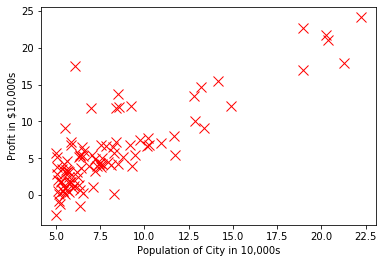

In [0]:
fig = plotData(x,y)
fig.show()

Preprocessing the data and preparing for Linear Regression Model

In [0]:
m = len(y)
ones = np.ones_like(x) #an array of ones of same dimension as x
X = np.hstack((ones,x)) # Add a column of ones to x. hstack means stacking horizontally i.e. columnwise
theta = np.zeros(2) # initialize
print(m)
print(X[:5])
print(theta)

97
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]
[0. 0.]


Defining the Cost Function based on input features and assumed theta parameters.

In [0]:
def computeCost(X, y, theta):
    m = len(y)
    J = (np.sum((np.dot(X,theta) - y)**2))/(2*m)
    return J


In [0]:
computeCost(X, y, theta)

32.072733877455676

Calculating gradient descent performing on reducing the cost function and optimizing theta parameters.

In [0]:
iterations = 1500
alpha = 0.01
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y) # number of training examples
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = theta - (alpha/m)*np.sum((np.dot(X,theta)-y)[:,None]*X,axis=0)
        J_history[i] = computeCost(X, y, theta)
        print('Cost function: ',J_history[i])
    return (theta, J_history)


In [0]:
theta, hist = gradientDescent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent: ')
print(theta[0],"\n", theta[1])


Cost function:  6.737190464870006
Cost function:  5.931593568604956
Cost function:  5.901154707081388
Cost function:  5.895228586444221
Cost function:  5.89009494311733
Cost function:  5.885004158443647
Cost function:  5.879932480491418
Cost function:  5.874879094762575
Cost function:  5.869843911806386
Cost function:  5.8648268653129305
Cost function:  5.859827889932181
Cost function:  5.85484692057229
Cost function:  5.849883892376587
Cost function:  5.844938740722034
Cost function:  5.840011401218361
Cost function:  5.8351018097072265
Cost function:  5.830209902261388
Cost function:  5.825335615183863
Cost function:  5.820478885007099
Cost function:  5.815639648492154
Cost function:  5.81081784262787
Cost function:  5.806013404630044
Cost function:  5.801226271940628
Cost function:  5.796456382226899
Cost function:  5.791703673380653
Cost function:  5.786968083517396
Cost function:  5.782249550975539
Cost function:  5.777548014315596
Cost function:  5.772863412319381
Cost function: 

Plotting the Best Linear fit based on new theta parameters.

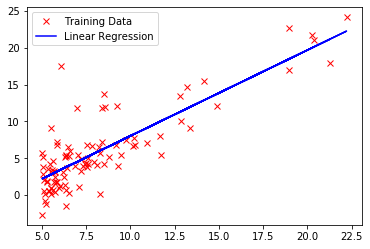

In [0]:
# Plot the linear fit
plt.plot(x,y,'rx',x,np.dot(X,theta),'b-')
plt.legend(['Training Data','Linear Regression'])
plt.show()


Predicting the profits based on new and optimized theta parameters.

In [0]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5],theta) # takes inner product to get y_bar
print('For population = 35,000, we predict a profit of ', predict1*10000)

predict2 = np.dot([1, 7],theta)
print('For population = 70,000, we predict a profit of ', predict2*10000)


For population = 35,000, we predict a profit of  4519.7678677017675
For population = 70,000, we predict a profit of  45342.45012944714


Checking the gradient descent performance in 3D grid, plotting cost function and theta parameters.

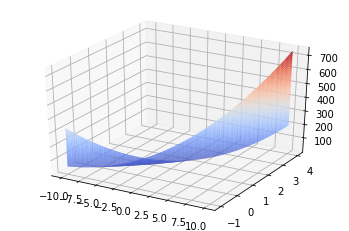

In [0]:
# Grid over which we will calculate J 
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i][j] = computeCost(X,y,t)

# Surface plot using J_Vals
fig = plt.figure()
ax = plt.subplot(111,projection='3d')
Axes3D.plot_surface(ax,theta0_vals,theta1_vals,J_vals,cmap=cm.coolwarm)
plt.show()

Plotting the 2D contour fit with respect to theta1 and theta2 to see the convergence to minimum of cost function J.

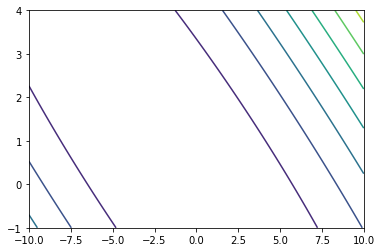

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
plt.contour(theta0_vals,theta1_vals,J_vals) 
plt.show()


Checking the cost reducing by no. of iterations over converging the graph to minimum.

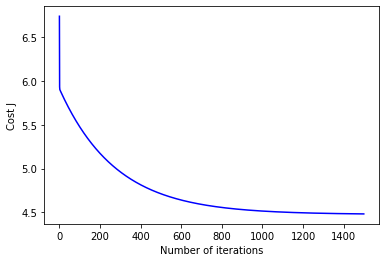

In [0]:
# Plot convergence graph
fig = plt.figure()
ax = plt.subplot(111)
plt.plot(np.arange(len(hist)),hist ,'-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()
